In [1]:
import mpl_toolkits
from mpl_toolkits import mplot3d
#base environment
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math as mt
import datetime
from datetime import datetime, timedelta, time

from mpl_toolkits.mplot3d import axes3d

import os

In [2]:
#if movies are in lots of different folders
file_list=[]
# folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output'
folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output12'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('DP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataDP=pd.concat(file_list, axis =0, ignore_index=True)
dataDP['Hoxb5_status']='DP'
print(dataDP)

file_list=[]
# folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output'
folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output12'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('SP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataSP=pd.concat(file_list, axis =0, ignore_index=True)
dataSP['Hoxb5_status']='SP'

     ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0              1             1                 NaN                    NaN   
1              1             2                 NaN                    NaN   
2              2             1                 NaN                    NaN   
3              2             2                 NaN                    NaN   
4              3             1                 NaN                    NaN   
..           ...           ...                 ...                    ...   
157          125             3                 NaN                    NaN   
158          126             1                 NaN                    NaN   
159          126             2                 NaN                    NaN   
160          126             3                 NaN                    NaN   
161          126             4                 NaN                    NaN   

     Metadata_Format1  Metadata_Format2  Metadata_Frame  Metadata_Series  \

In [3]:
#Combining SP and DP
data=pd.concat([dataSP, dataDP], axis=0, ignore_index=True)
print(data)

data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output12/combined_datav12.csv')


    ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0            22            1                 NaN                    NaN   
1            22            2                 NaN                    NaN   
2            23            1                 NaN                    NaN   
3            23            2                 NaN                    NaN   
4            23            3                 NaN                    NaN   
..          ...          ...                 ...                    ...   
412         125            3                 NaN                    NaN   
413         126            1                 NaN                    NaN   
414         126            2                 NaN                    NaN   
415         126            3                 NaN                    NaN   
416         126            4                 NaN                    NaN   

     Metadata_Format1  Metadata_Format2 Metadata_Frame Metadata_Series  \
0                 NaN    

In [4]:
#IMPORTING THE MICE METADATA
#date must be in the format of YYYY-MM-DD=> change manually in excell
metadata=pd.read_csv('/Users/secchim/Documents/230210_VWF_078_metadata_edited.csv')

metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
print(metadata['Metadata_VWF'])

# data['Metadata_VWF']=(data['Metadata_VWF']).str.replace('_movie_','_')
print(data['Metadata_VWF'])
data=pd.merge(data, metadata[:], on = 'Metadata_VWF')
print(len(data))

0                  VWF_078_MS230119_M1_tilescan_Day0_TR1
1                  VWF_078_MS230119_M3_tilescan_Day0_TR1
2                  VWF_078_MS230119_M2_tilescan_Day0_TR1
3                  VWF_078_MS230119_M4_tilescan_Day0_TR1
4                  VWF_078_MS230120_M1_tilescan_Day1_TR1
                             ...                        
140    VWF_078_MS230120_M3_tilescan_Day1-Stitching-02...
141    VWF_078_MS230122_M5_tilescan_Day0-Stitching-02...
142    VWF_078_MS230123_M5_tilescan_Day1-Stitching-05...
143    VWF_078_MS230122_M6_tilescan_Day0-Stitching-03...
144    VWF_078_MS230126_M6_tilescan_calvarium-Stitchi...
Name: Metadata_VWF, Length: 145, dtype: object
0      VWF_078_MS230123_M5_movie_P4
1      VWF_078_MS230123_M5_movie_P4
2      VWF_078_MS230123_M5_movie_P4
3      VWF_078_MS230123_M5_movie_P4
4      VWF_078_MS230123_M5_movie_P4
                   ...             
412    VWF_078_MS230123_M5_movie_P8
413    VWF_078_MS230123_M5_movie_P8
414    VWF_078_MS230123_M5_movie_P8
41

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/2386871548.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')


In [5]:
data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output12/combined_data_v12.csv')

In [6]:
#TRACK ID IS UNIQUE PER CELL PER MOVIE
data['Track_ID'] = 'X'
data['Track_ID']=(data['Metadata_VWF']) +'_'+((data['Intensity_MaxIntensity_track']).astype(str))
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/KuOTrackingRemovedObjectsSPbin.csv', index=False)

#REMOVE CELLS THAT WERE NOT TRACKED IN TRACKMATE
print(data.index)
data= data[data['Intensity_MaxIntensity_track'] != 0] #worked
print(data.index)
print(data)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            407, 408, 409, 410, 411, 412, 413, 414, 415, 416],
           dtype='int64', length=417)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            407, 408, 409, 410, 411, 412, 413, 414, 415, 416],
           dtype='int64', length=417)
    ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0            22            1                 NaN                    NaN   
1            22            2                 NaN                    NaN   
2            23            1                 NaN                    NaN   
3            23            2                 NaN                    NaN   
4            23            3                 NaN                    NaN   
..          ...          ...                 ...                    ...   
412          80            1                 NaN                    NaN   
413          81            1              

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/3738600064.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Track_ID'] = 'X'


In [7]:
#time per timepoint
from datetime import datetime
from datetime import timedelta
# print(str(data['AcquisitionDate']),str(data['AcquisitionTime']))
#https://docs.python.org/3/library/datetime.html#timedelta-objects

#Acquisition date must be in the format of YYYY-MM-DD=> change manually in excell if needed
#Run this line to correct for the weird Zen format
data['AcquisitionTime']=data['AcquisitionTime'].str[:8]
# print(data['AcquisitionTime_x'])
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output/combined_data.csv')
# data=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output/combined_data.csv')

for i in data.index:
    data.loc[i, 'Timeframe_Time']=(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'AcquisitionTime'])))+timedelta(minutes=int(3*(data.loc[i, 'Metadata_Timepoint'])))
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output/combined_data.csv')


In [8]:
#NORMALIZING POSITIONS TO THE FIRST COORDINATES
#do on the unique Cell_ID rather than Track_ID
#PROBLEM OF I DONT HAVE THE Z FOR THE STAGE POSITION
data['corrected_x_2']=data['Location_Center_X']
data['corrected_y_2']=data['Location_Center_Y']
data['corrected_z_2']=data['Location_Center_Z']
data['norm_x']=0
grouped=data.groupby(['Track_ID'])

dflist=[]
print(grouped)
for i, newdf in grouped:
    newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
    norm_x=newdf2['Location_Center_X'].values
    norm_y=newdf2['Location_Center_Y'].values
    norm_z=newdf2['Location_Center_Z'].values

    newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
    # print(newdf['norm_x'])
    newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
    # print(newdf['corrected_x_2'])
    newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
    newdf['corrected_y_2']=((newdf['Location_Center_Y']-newdf['norm_y'])*(newdf['Scale_Y'])*1000000)
    newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
    newdf['corrected_z_2']=((newdf['Location_Center_Z']-newdf['norm_z'])*(newdf['Scale_Z'])*1000000)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data)

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/3767451163.py:12: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


    ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
384          17            1                 NaN                    NaN   
390          19            2                 NaN                    NaN   
346           1            1                 NaN                    NaN   
348           2            1                 NaN                    NaN   
350           3            1                 NaN                    NaN   
..          ...          ...                 ...                    ...   
340         125            2                 NaN                    NaN   
343         126            2                 NaN                    NaN   
281         117            4                 NaN                    NaN   
286         118            5                 NaN                    NaN   
289         119            3                 NaN                    NaN   

     Metadata_Format1  Metadata_Format2 Metadata_Frame Metadata_Series  \
384               NaN    

In [9]:
#added these lines when not calculating FINAL CELL ID
data['FileID']=data['Position_Name'].str[:19]
print(data['FileID'])
data['Cell_group']=data['FileID']+'_'+data['Cell_name']
data['Final_Cell_ID']=data['Track_ID']
######
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
#sorting values so the next frame is accurate
for i, newdf in grouped:
    newdf=newdf.sort_values(by=['Timeframe_Time'])
    print(newdf['Timeframe_Time'])
    dflist.append(newdf)
data=pd.concat(dflist)   

#Step adding the location of the next frame to do the normalization
#shift takes the next row(?) and puts it in the current row
data["corrected_x_2_next"] = data["corrected_x_2"].shift(-1)
data["corrected_y_2_next"] = data["corrected_y_2"].shift(-1)
data["corrected_z_2_next"] = data["corrected_z_2"].shift(-1)
print(data["corrected_x_2_next"], data ["corrected_x_2"])

384    VWF_078_MS230123_M5
390    VWF_078_MS230123_M5
346    VWF_078_MS230123_M5
348    VWF_078_MS230123_M5
350    VWF_078_MS230123_M5
              ...         
340    VWF_078_MS230123_M5
343    VWF_078_MS230123_M5
281    VWF_078_MS230123_M5
286    VWF_078_MS230123_M5
289    VWF_078_MS230123_M5
Name: FileID, Length: 417, dtype: object
384   2023-01-23 11:49:08
Name: Timeframe_Time, dtype: datetime64[ns]
390   2023-01-23 11:55:08
Name: Timeframe_Time, dtype: datetime64[ns]
346   2023-01-23 11:01:08
348   2023-01-23 11:04:08
350   2023-01-23 11:07:08
352   2023-01-23 11:10:08
355   2023-01-23 11:13:08
357   2023-01-23 11:16:08
360   2023-01-23 11:19:08
363   2023-01-23 11:22:08
366   2023-01-23 11:25:08
369   2023-01-23 11:28:08
371   2023-01-23 11:31:08
373   2023-01-23 11:34:08
375   2023-01-23 11:37:08
378   2023-01-23 11:40:08
380   2023-01-23 11:43:08
382   2023-01-23 11:46:08
385   2023-01-23 11:49:08
387   2023-01-23 11:52:08
393   2023-01-23 11:58:08
396   2023-01-23 12:01:08
Na

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/1842843401.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [10]:
import math #if import math not loaded this cell won't work

#annotate the last timeframe 
data["Last_timepoint"]=True
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, "Timeframe_Time"])== (newdf['Timeframe_Time'].max()):
                newdf.loc[b, "Last_timepoint"]=True
            else:
                newdf.loc[b, "Last_timepoint"]=False
    dflist.append(newdf)
data=pd.concat(dflist)              
# print(data)

# calculate distance between timeframes
data['distance']= None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
                # print(b, newdf.loc[b, "Timeframe_Time"], newdf.loc[b,'Final_Cell_ID'], newdf.loc[b,'Metadata_Timepoint'], newdf.shape[0]-1)
                # try:
                newdf.loc[b, "distance"]=(math.sqrt((newdf.loc[b, "corrected_x_2"]-newdf.loc[b, "corrected_x_2_next"])**2+(newdf.loc[b, "corrected_y_2"]-newdf.loc[b, "corrected_y_2_next"])**2+(newdf.loc[b, "corrected_z_2"]-newdf.loc[b, "corrected_z_2_next"])**2))
                    # newdf["distance"]=(math.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
                # except:
                    # print(i, b, "error")
                    # newdf.loc[b, "distance"]='NaN'
                    # pass
        # print(newdf["distance"])
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['distance'])
#.sort_values(by=['Timeframe_Time']).reset_index()




/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/3019793773.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/3019793773.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


384        None
390        None
346    0.629852
348    0.966667
350    0.581731
         ...   
340    2.838991
343        None
281    2.813338
286    1.712687
289        None
Name: distance, Length: 417, dtype: object


In [11]:
#Calculate track length
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf.dropna()
    newdf['track_length']=newdf['distance'].sum()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['track_length'])   

384     0.000000
390     0.000000
346    29.530207
348    29.530207
350    29.530207
         ...    
340    37.193844
343    37.193844
281     4.526025
286     4.526025
289     4.526025
Name: track_length, Length: 417, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/2701469315.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [12]:
#calculate displacement for every timepoint
data['displacement']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    stored_X0=newdf['corrected_x_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    stored_Y0=newdf['corrected_y_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    stored_Z0=newdf['corrected_z_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    for b, r in newdf.iterrows():
        newdf.loc[b, "displacement"]=math.sqrt((newdf["corrected_x_2"][b]-stored_X0)**2+(newdf["corrected_y_2"][b]-stored_Y0)**2+(newdf["corrected_z_2"][b]-stored_Z0)**2)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['displacement'])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/4218996381.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


384         0.0
390         0.0
346         0.0
348    0.629852
350    1.069344
         ...   
340    6.433937
343    7.799885
281         0.0
286    2.813338
289    4.407296
Name: displacement, Length: 417, dtype: object


In [13]:
#maximum displacement
data['max_displacement']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['max_displacement']=newdf['displacement'].max()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['max_displacement'])

384    0.000000
390    0.000000
346    5.126883
348    5.126883
350    5.126883
         ...   
340    7.799885
343    7.799885
281    4.407296
286    4.407296
289    4.407296
Name: max_displacement, Length: 417, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/2756133412.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [14]:
#mean speed in um/sec
#potentially wrong
#gives NaN for cells that have only one timepoint so these cells were removed in the if statement


data['mean_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        mean_speed=newdf['track_length']/((newdf['Timeframe_Time'].max()-newdf['Timeframe_Time'].min()).total_seconds())
        newdf['mean_speed']=mean_speed
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['mean_speed'])

384        None
390        None
346    0.008203
348    0.008203
350    0.008203
         ...   
340    0.010332
343    0.010332
281    0.012572
286    0.012572
289    0.012572
Name: mean_speed, Length: 417, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/434112148.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [16]:
#This line would be useful if different movies were connected and the time between 2 frames wasn't always 3min
data["Timeframe_Time_next"] = data["Timeframe_Time"].shift(-1)

In [17]:
#frame speed
data=data.drop_duplicates() #why do I have duplicates?
data['frame_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
            #if newdf.loc[b,'displacement']>0 and newdf.loc[b+1, 'displacement']>0:
            # try:
                newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'distance']/((newdf.loc[b,'Timeframe_Time']-newdf.loc[(b),'Timeframe_Time_next']).total_seconds()))
            # except:
                # newdf.loc[b, "frame_speed"]='NaN'
            # print(b, newdf["frame_speed"])
                # pass
            # else:
                # print(b, 'error')
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['frame_speed'])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/2036998357.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


384        None
390        None
346    0.003499
348     0.00537
350    0.003232
         ...   
340    0.015772
343        None
281     0.01563
286    0.009515
289        None
Name: frame_speed, Length: 417, dtype: object


In [18]:
#linearity coefficient

data['linearity_coefficient']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['linearity_coefficient']=newdf['max_displacement']/newdf['track_length']
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['linearity_coefficient'])


384         NaN
390         NaN
346    0.173615
348    0.173615
350    0.173615
         ...   
340    0.209709
343    0.209709
281    0.973767
286    0.973767
289    0.973767
Name: linearity_coefficient, Length: 417, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/170172036.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [19]:
#arrest coefficient
#speed<2/60um/sec

# data=data.dropna(axis=0)
#First classifying timeframes as arrested or not
data['arrested']=False
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    for b, r in newdf.iterrows():
        # print((newdf.loc[b,'mean_speed']),2/60, b)
        # print(newdf.loc[b])
        if (newdf.loc[b,'frame_speed'])!=None and (newdf.loc[b,'frame_speed'])<(2/60): #different from NaN
            newdf.loc[b,'arrested']=True
        else :
            newdf.loc[b,'arrested']=False
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['arrested'])

# LOTS OF DUPLICATES CREATED? WHEN ? #I think because of df list in the wrong place
datax=data.drop_duplicates()

data['arrest_coefficient']=False
data=data.drop_duplicates()
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf2=newdf[newdf['arrested']==True]
    newdf3=newdf[newdf['arrested']==False]
    # print(newdf2['arrested'].shape[0],newdf3['arrested'].shape[0])
    if ((newdf2.shape[0])+(newdf3.shape[0]))>1:
        newdf['arrest_coefficient']=(newdf2.shape[0])/((newdf2.shape[0])+(newdf3.shape[0]))
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['arrest_coefficient'])

# datax.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/arrest_coef.csv')



/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/49191078.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


384    False
390    False
346     True
348     True
350     True
       ...  
340     True
343    False
281     True
286     True
289    False
Name: arrested, Length: 417, dtype: bool
384       False
390       False
346        0.95
348        0.95
350        0.95
         ...   
340    0.952381
343    0.952381
281    0.666667
286    0.666667
289    0.666667
Name: arrest_coefficient, Length: 417, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/49191078.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [20]:
number_of_cells=data['Final_Cell_ID'].unique()
print(len(number_of_cells))

data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output12/combined_data_v12.csv')

85


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/2052813257.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/2052813257.py:88: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


['VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P4_4.577706567943096e-05'
 'VWF_078_MS230123_M5_movie_P5_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P6_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P8_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P8_7.629510946571827e-05']
VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05
VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05
VWF_078_MS230123_M5_movie_P4_1.5259021893143654e-05
VWF_078_MS230123_M5_movie_P4_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P5_1.5259021893143654e-05
VWF_078_MS230123_M5_movie_P5_3.051804378628731e-05
VWF_078_MS230123_M5_movie_P5_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P5_6.103608757257462e-05
VWF_078_MS230123_M5_movie_P6_3.051804378628731e-05
VWF_078_MS230123_M5_movie_P7_1.5259021893143654e-05
VWF_078_MS230123_M5_movie_P7_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P8_1.5259021893143654e-05
VW

<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='track_length'>

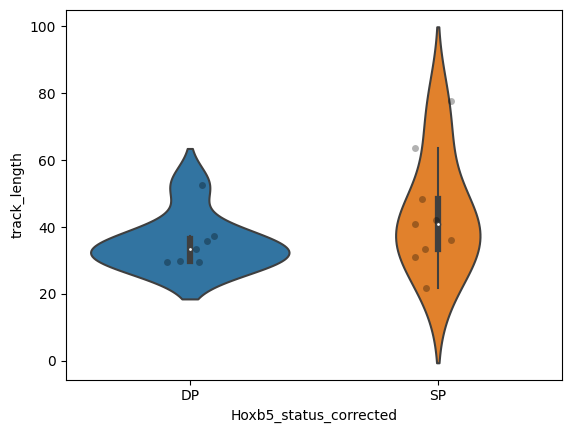

In [22]:
#PLOTTING RESULTS of track length

import statistics
import seaborn as sns

#Either:
# datax=data
#Or
data= pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output12/combined_data_v12.csv', header = 0)
data.dropna()
count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]

# print(len(data))
#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 10:#was 3
        Hoxb5Vwf_cells.append(i) #137
# # print(Hoxb5Vwf_cells)
    # dflist.append(newdf)
# datax=pd.concat(dflist)

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
print(Hoxb5Vwf_list)


datax=data
datax['Hoxb5_status_corrected']='SP'
for i in datax.index:
    if datax.loc[i,'Final_Cell_ID'] in Hoxb5Vwf_list:
        datax.loc[i,'Hoxb5_status_corrected']='DP'
        # print('DP', i)
    # else:
        # datax.loc[i,'Hoxb5_status_corrected']='SP'
        # print('SP', i)
# print(datax)
# print(len(datax))
# dx=datax.drop_duplicates()
# print(len(dx))
# print(dx['Relative_treatment_Time']=='na')



#IS THIS THE RIGHT PLACE FOR IT?
# #CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
# #SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
# grouped=data.groupby(['Final_Cell_ID'])
# # print(grouped)
# for i, newdf in grouped:
#     newdf=newdf[newdf['Hoxb5_status'] == 'DP']
#     # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
#     count_DP=newdf.shape[0]
#     # print(count_DP)
#     # if count_DP > (len(newdf.index))/2:
#     if count_DP > 3:
#         Hoxb5Vwf_cells.append(i) #137
# # # print(Hoxb5Vwf_cells)

# Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
# # print(Hoxb5Vwf_list)

# grouped=data.groupby(['Final_Cell_ID'])
# for i, newdf in grouped:
#     if i in Hoxb5Vwf_list:
#         newdf['Hoxb5_status_corrected']='DP'
#     else:
#         newdf['Hoxb5_status_corrected']='SP'
#     dflist.append(newdf)
# data=pd.concat(dflist)

# https://datavizpyr.com/boxplots-with-points-using-seaborn-in-python/
#https://seaborn.pydata.org/generated/seaborn.stripplot.html
datab=datax[['Final_Cell_ID', 'Hoxb5_status_corrected', 'track_length']]#or datax

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=11:#was 11
        df_list.append(newdf)
        print(i)
datab=pd.concat(df_list)
# print(len(datab))


dx=datab.drop_duplicates()
dx=dx[dx['track_length']!=0]

# print(dx)
sns.stripplot(x=('Hoxb5_status_corrected'), y="track_length", data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x=('Hoxb5_status_corrected'), y="track_length", data=dx, )

In [109]:
#NOT NECESSARY HERE BECAUSE ALL MOVIES WERE 1H - NOT OPTIMIZED, DOESNT WORK

#ONLY RUN ONCE OTHERWISE TRACKED COEFFICIENT CHANGES!!!

datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement', 'Nframes']]
# print(len(datab))

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=8:#was 11
        df_list.append(newdf)
        print(i)
datab=pd.concat(df_list)

df_list =[]
datab['Tracked_coefficient']=None
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    newdf['Track_length_in_timepoint']=newdf.shape[0]
    for r in newdf.index:
        newdf.loc[r, 'Tracked_coefficient']=newdf.loc[r,'Track_length_in_timepoint']/newdf.loc[r,'Nframes']
    df_list.append(newdf)
datab=pd.concat(df_list)
# print(len(datab))
# datay=datax.groupby("Final_Cell_ID").agg([np.mean,np.std])
# print(datay)
# print(datab['Tracked_coefficient'])

# dx=datax.groupby(['Final_Cell_ID'])
# print(dx)
# for grouping_item, grouped_df in dx:
    # sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="track_length", data=grouped_df)
    # sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="track_length", data=grouped_df, dodge=True, color='black', alpha=0.3)

dx=datab.drop_duplicates()
# # print(dx)
# sns.boxplot(x=("Treatment"), hue='Hoxb5_status_corrected', y='Track_length_in_timepoint', data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y='Track_length_in_timepoint', data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


sns.stripplot(x=('Hoxb5_status_corrected'),y='Tracked_coefficient', data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status_corrected', y='Tracked_coefficient', data=dx)


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/1389356185.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/1389356185.py:17: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05
VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05
VWF_078_MS230123_M5_movie_P3_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P4_0.000106813153252
VWF_078_MS230123_M5_movie_P4_0.0001983672846108
VWF_078_MS230123_M5_movie_P4_0.000213626306504
VWF_078_MS230123_M5_movie_P4_0.0002288853283971
VWF_078_MS230123_M5_movie_P4_0.0002441443502902
VWF_078_MS230123_M5_movie_P4_0.0003356984816491
VWF_078_MS230123_M5_movie_P4_0.0003814755473285
VWF_078_MS230123_M5_movie_P4_0.0004119935911148
VWF_078_MS230123_M5_movie_P4_0.0004882887005805
VWF_078_MS230123_M5_movie_P4_0.00053406576626
VWF_078_MS230123_M5_movie_P4_0.0005493247881531
VWF_078_MS230123_M5_movie_P4_0.0005951018538326
VWF_078_MS230123_M5_movie_P4_0.000640878919512
VWF_078_MS230123_M5_movie_P4_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P4_6.103608757257462e-05
VWF_078_MS230123_M5_movie_P4_7.629510946571827e-05
VWF_078_MS230123_M5_movie_P4_9.155413135886192e-05
VWF_078_MS230123_M5_mov

ValueError: object arrays are not supported

VWF_078_MS230123_M5_movie_P5_0.0001983672846108
VWF_078_MS230123_M5_movie_P5_0.000213626306504
VWF_078_MS230123_M5_movie_P5_0.0002288853283971
VWF_078_MS230123_M5_movie_P5_0.0002594033721834
VWF_078_MS230123_M5_movie_P5_0.0002899214159697
VWF_078_MS230123_M5_movie_P5_3.051804378628731e-05
VWF_078_MS230123_M5_movie_P5_7.629510946571827e-05
VWF_078_MS230123_M5_movie_P6_1.5259021893143654e-05


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/95041812.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='max_displacement'>

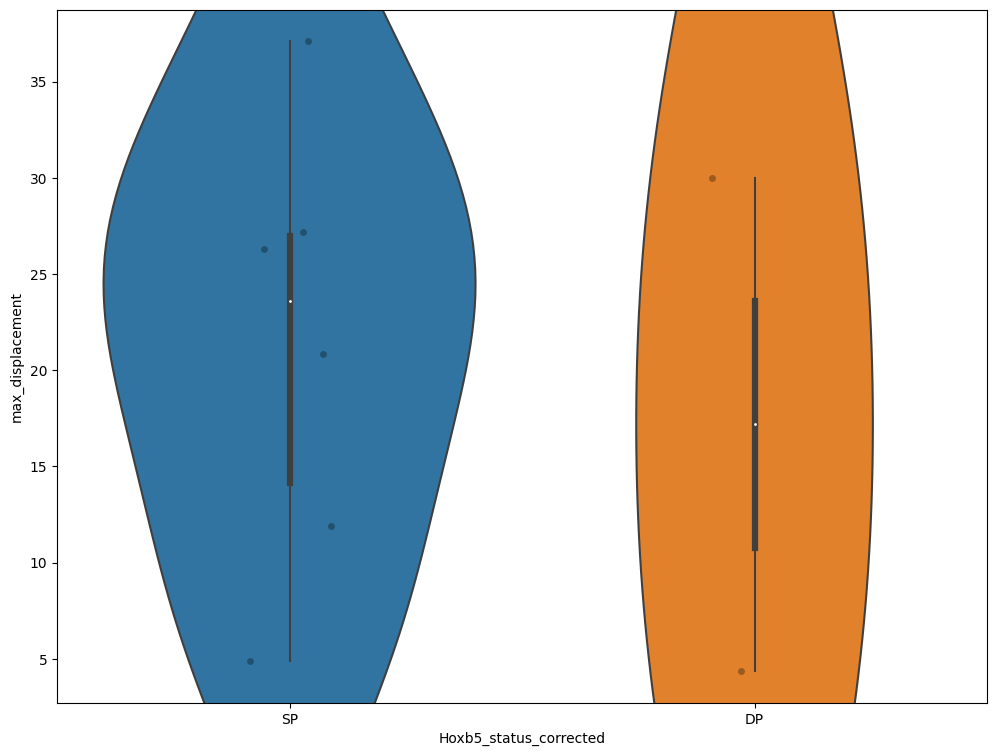

In [170]:
#PRINT MAXIMUM DISPLACEMENT

datab=datax[['Final_Cell_ID', 'Hoxb5_status_corrected', 'max_displacement']]
# print(len(datab))

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=11:
        print(i)
        df_list.append(newdf)
datab=pd.concat(df_list)

dx=datab.drop_duplicates()
dx=dx[dx['max_displacement']!=0]
# print(dx)
sns.violinplot(x='Hoxb5_status_corrected', y="max_displacement", data=dx)
sns.stripplot(x='Hoxb5_status_corrected', y="max_displacement", data=dx, dodge=True, color='black', alpha=0.3)


<AxesSubplot: xlabel='cell_type', ylabel='max_distance'>

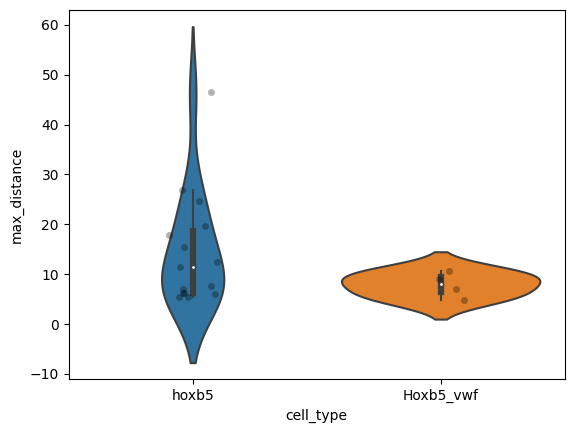

In [52]:
#COMPARING AUTOMATED AND MANUAL MAX DISPLACEMENT/ MAX DISTANCE 

manu=pd.read_csv('/Users/secchim/Downloads/IVM_230412.csv')

manu_x=manu[manu['max_distance']!=0]

manu_dx=manu_x[manu_x['condition']=='ageing']
manu_dx.dropna()
sns.stripplot( x='cell_type', y="max_distance", data=manu_dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='cell_type', y="max_distance", data=manu_dx)

<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='frame_speed'>

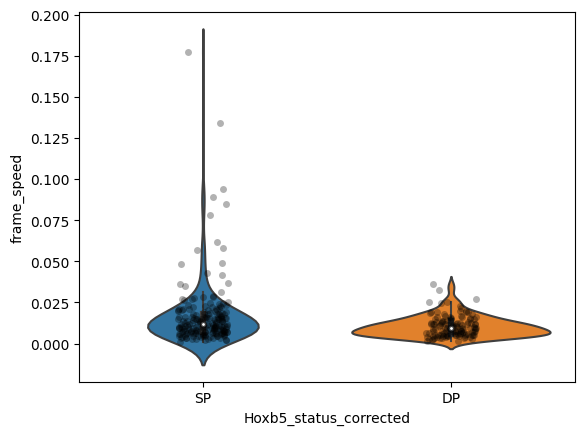

In [46]:

###FRAME SPEED VIOLIN PLOT
dx=datax[datax['frame_speed']!=0]
dx.dropna()
sns.stripplot( x='Hoxb5_status_corrected', y="frame_speed", data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status_corrected', y="frame_speed", data=dx)


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/2336171244.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manu_x['speed_sec']=manu_x['speed']/60


<AxesSubplot: xlabel='cell_type', ylabel='speed_sec'>

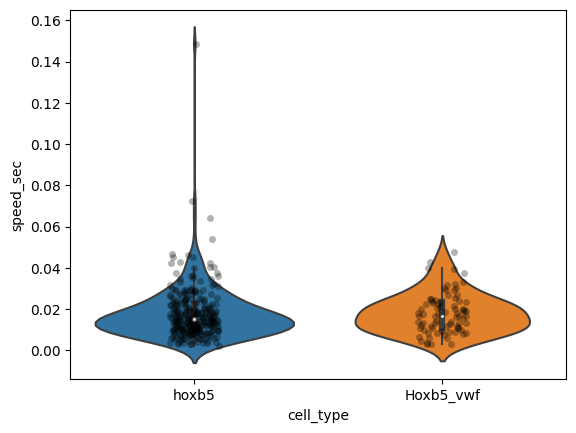

In [50]:
#COMPARING FRAME SPEED FROM CP TO FRAME SPEED FROM MANUAL TRACKING

manu=pd.read_csv('/Users/secchim/Downloads/IVM_230412.csv')

manu_x=manu[manu['speed']!=0]
manu_x['speed_sec']=manu_x['speed']/60
manu_dx=manu_x[manu_x['condition']=='ageing']
manu_dx.dropna()
sns.stripplot( x='cell_type', y="speed_sec", data=manu_dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='cell_type', y="speed_sec", data=manu_dx)

<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='distance'>

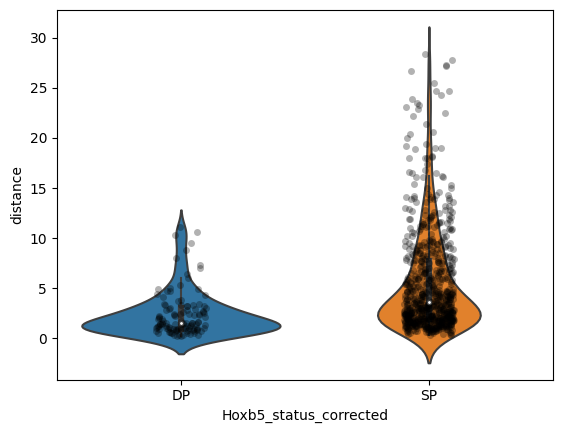

In [117]:
#QC plot
# 
dx=datax[datax['max_displacement']!=0]

dx.dropna()

##DISTANCE VIOLIN PLOT
sns.stripplot( x='Hoxb5_status_corrected', y="distance", data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status_corrected', y="distance", data=dx)


                                          Final_Cell_ID        Treatment  \
0     VWF_078_MS230123_M5_movie_P3_1.525902189314365...  old_homeostasis   
21    VWF_078_MS230123_M5_movie_P3_3.051804378628731...  old_homeostasis   
42    VWF_078_MS230123_M5_movie_P3_4.577706567943096...  old_homeostasis   
63       VWF_078_MS230123_M5_movie_P4_0.000106813153252  old_homeostasis   
82      VWF_078_MS230123_M5_movie_P4_0.0001220721751451  old_homeostasis   
...                                                 ...              ...   
1157  VWF_078_MS230123_M5_movie_P8_3.051804378628731...  old_homeostasis   
1171  VWF_078_MS230123_M5_movie_P8_4.577706567943096...  old_homeostasis   
1192  VWF_078_MS230123_M5_movie_P8_6.103608757257462...  old_homeostasis   
1194  VWF_078_MS230123_M5_movie_P8_7.629510946571827...  old_homeostasis   
1215  VWF_078_MS230123_M5_movie_P8_9.155413135886192...  old_homeostasis   

     Hoxb5_status_corrected  arrest_coefficient  max_displacement  
0                  

<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='arrest_coefficient'>

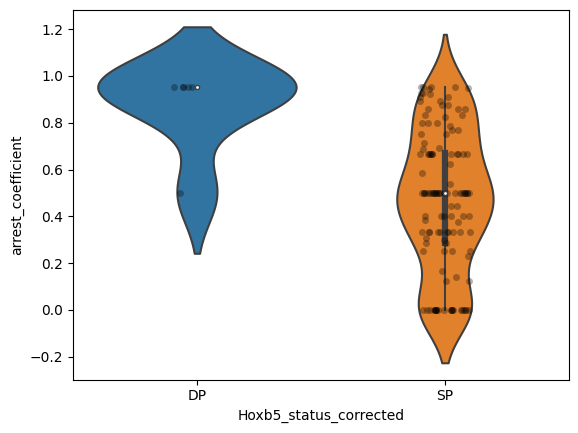

In [127]:
#ARREST COEFFICIENT VIOLIN PLOT

dx=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'arrest_coefficient', 'max_displacement']]
#WASN'T WORKING BECAUSE SOME FALSE 
dx=dx[dx['arrest_coefficient']!='FALSE']
dx=dx[dx['arrest_coefficient']!='false']
dx=dx[dx['arrest_coefficient']!='False']

#THIS LINE EXCLUDES THE CELLS THAT ARE NOT REALLY MOVING
# dx=dx[dx['max_displacement']>10]
dx.dropna()
dx = dx.astype({"arrest_coefficient": np.float16})
dx=dx.drop_duplicates()
print(dx)
sns.stripplot( x='Hoxb5_status_corrected', y="arrest_coefficient", data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status_corrected', y="arrest_coefficient", data=dx)

<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='linearity_coefficient'>

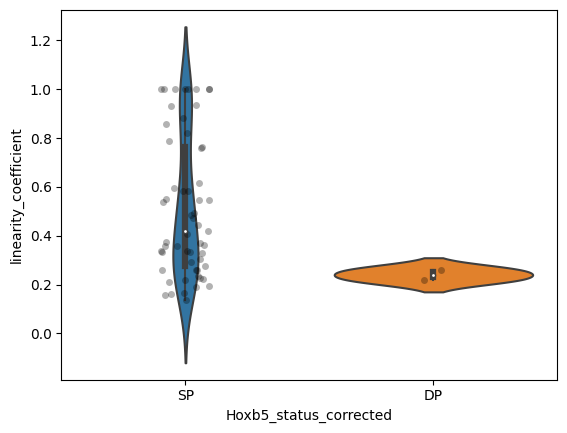

In [132]:
##LINEARITY COEFFICIENT VIOLIN PLOT
dx=data[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'linearity_coefficient','max_displacement']]
dx.dropna()
#THIS LINE EXCLUDES THE CELLS THAT ARE NOT REALLY MOVING
dx=dx[dx['max_displacement']>10]
dx=dx.drop_duplicates()
sns.stripplot( x='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status_corrected', y="linearity_coefficient", data=dx)


['VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P3_4.577706567943096e-05'
 'VWF_078_MS230123_M5_movie_P4_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P4_4.577706567943096e-05'
 'VWF_078_MS230123_M5_movie_P5_0.0001831082627177'
 'VWF_078_MS230123_M5_movie_P5_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P5_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P7_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P7_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P8_0.000106813153252'
 'VWF_078_MS230123_M5_movie_P8_0.0001373311970382'
 'VWF_078_MS230123_M5_movie_P8_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P8_4.577706567943096e-05'
 'VWF_078_MS230123_M5_movie_P8_6.103608757257462e-05'
 'VWF_078_MS230123_M5_movie_P8_7.629510946571827e-05']
VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05 no problem
VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05 no problem
VWF_078_MS230123_

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_84063/2961232864.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


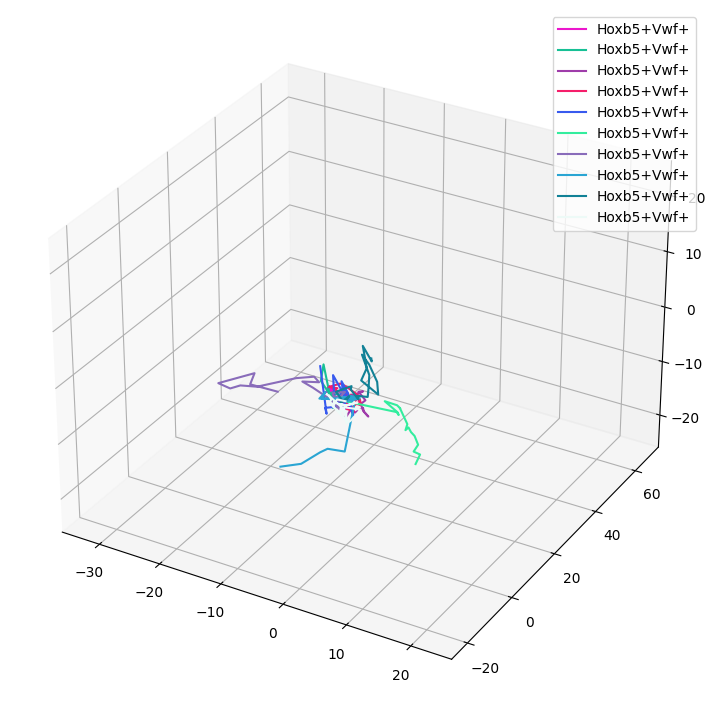

In [24]:
### homeostasis plot, separating Hoxb5+Vwf+

data=datax
#DELETE THESE LINES BECAUSE FILTERED BEFORE?
#removing TRACKS THAT ARE TOO SHORT
print(Hoxb5Vwf_list)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=16:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


# print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#Plotting the tracks 

for a in Hoxb5Vwf_list:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list:# and a not in my_list_hoxb5:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf+', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        ax.set_xlim(-35, 25)
        ax.set_ylim(-25, 70)
        ax.set_zlim(-25, 25)
        ax.legend(loc='upper right')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


VWF_078_MS230123_M5_movie_P5_0.000106813153252 PBM
VWF_078_MS230123_M5_movie_P5_0.0001220721751451 PBM
VWF_078_MS230123_M5_movie_P5_0.0001373311970382 PBM
VWF_078_MS230123_M5_movie_P5_0.0001525902189314 PBM
VWF_078_MS230123_M5_movie_P5_0.0001678492408245 PBM
VWF_078_MS230123_M5_movie_P5_0.0001831082627177 PBM
VWF_078_MS230123_M5_movie_P5_0.0001983672846108 no problem
VWF_078_MS230123_M5_movie_P5_0.000213626306504 no problem
VWF_078_MS230123_M5_movie_P5_0.0002288853283971 no problem
VWF_078_MS230123_M5_movie_P5_0.0002441443502902 PBM
VWF_078_MS230123_M5_movie_P5_0.0002594033721834 no problem
VWF_078_MS230123_M5_movie_P5_0.0002746623940765 PBM
VWF_078_MS230123_M5_movie_P5_0.0002899214159697 no problem
VWF_078_MS230123_M5_movie_P5_0.0003051804378628 PBM
VWF_078_MS230123_M5_movie_P5_0.000320439459756 PBM
VWF_078_MS230123_M5_movie_P5_0.0003356984816491 PBM
VWF_078_MS230123_M5_movie_P5_0.0003509575035423 PBM
VWF_078_MS230123_M5_movie_P5_0.0003662165254354 PBM
VWF_078_MS230123_M5_movie_P5_0.0

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/1516326444.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


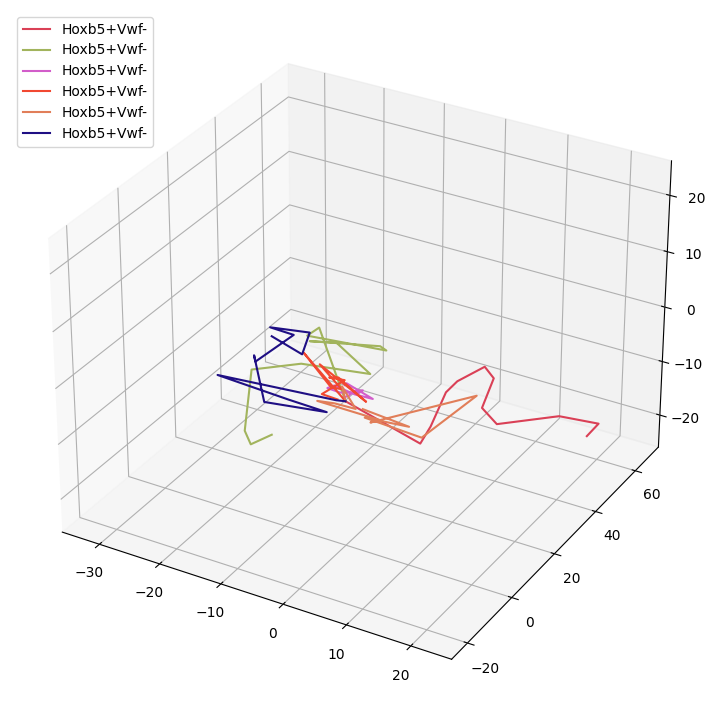

In [172]:
### homeostasis plot, separating Hoxb5+Vwf-


#removing TRACKS THAT ARE TOO SHORT
#print(my_list_hoxb5vwf)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=11:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


# print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_list_hoxb5 = np.unique(data['Track_ID'])
print(len(my_list_hoxb5))

#Plotting the tracks 

for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list and a not in Hoxb5Vwf_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        ax.set_xlim(-35, 25)
        ax.set_ylim(-25, 70)
        ax.set_zlim(-25, 25)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


<AxesSubplot: xlabel='Hoxb5_status', ylabel='Intensity_MeanIntensity_GFP'>

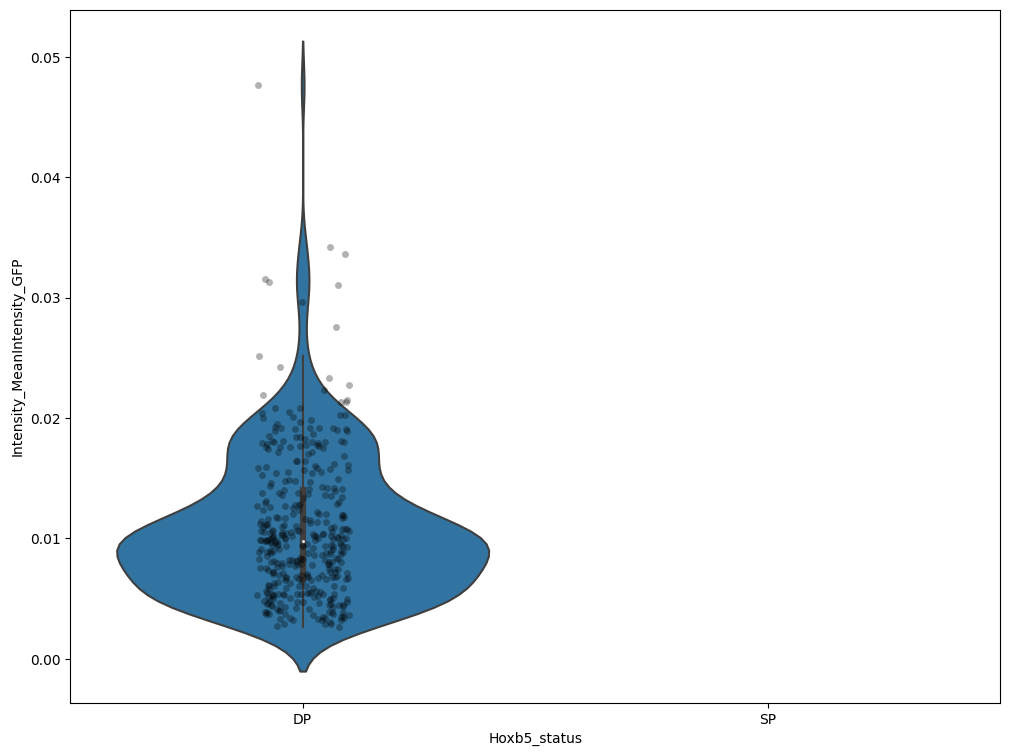

In [25]:
data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_outputv6/combined_data3.csv", header = 0)
data.dropna()

sns.stripplot( x='Hoxb5_status', y="Intensity_MeanIntensity_GFP", data=data, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status', y="Intensity_MeanIntensity_GFP", data=data)

In [38]:
HVfile_list=[]
file_list=[]
# folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output'
folderpath='/Users/secchim/Documents/Experiments/VWF_078_aged_IVM'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('_Position.csv'):
            if 'Track' not in file:
                if 'b5_Vwf' in file or 'b5vwf' in file:
                    HVfile_list.append(os.path.join(root,file))
            # file_list.append(os.path.join(root,file))
                    # print(os.path.join(root,file))
                    # print('end')
                    # data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
                    # file_list.append(data)
# print(HVfile_list)

# for file in HVfile_list:
#     data=pd.read_csv(file, index_col=None, header=0)
#     file_list.append(data)

# dataDP=pd.concat(file_list, axis =0, ignore_index=True)
# dataDP['Hoxb5_status']='DP'
# print(dataDP)

# file_list=[]

# for root,dirs, files in os.walk(folderpath):
#     for file in files:
#         if file.endswith('_Position.csv'):
#             if 'Track' not in file:
#                 if 'b5_Vwf' not in file or 'b5vwf'not in file:
#             # file_list.append(os.path.join(root,file))
#                     data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
#                     file_list.append(data)

# dataSP=pd.concat(file_list, axis =0, ignore_index=True)
# dataSP['Hoxb5_status']='SP'

# # '/Users/secchim/Documents/Experiments/VWF_078_aged_IVM/VWF_078_MS230123_M5_movie_[ii0_VWF_078_MS230123_M5_movie_Image_1]Hoxb5_Statistics/VWF_078_MS230123_M5_movie_[ii0_VWF_078_MS230123_M5_movie_Image_1]Hoxb5_Position.csv'

['/Users/secchim/Documents/Experiments/VWF_078_aged_IVM/VWF_078_MS230123_M5_movie_[ii4_VWF_078_MS230123_M5_movie_Image_5]Hoxb5_Vwf_Statistics/VWF_078_MS230123_M5_movie_[ii4_VWF_078_MS230123_M5_movie_Image_5]Hoxb5_Vwf_Position.csv', '/Users/secchim/Documents/Experiments/VWF_078_aged_IVM/VWF_078_MS230123_M5_movie_[ii3_VWF_078_MS230123_M5_movie_Image_4]hoxb5vwf_Statistics/VWF_078_MS230123_M5_movie_[ii3_VWF_078_MS230123_M5_movie_Image_4]hoxb5vwf_Position.csv', '/Users/secchim/Documents/Experiments/VWF_078_aged_IVM/VWF_078_MS230123_M5_movie_[ii1_VWF_078_MS230123_M5_movie_Image_2]Hoxb5vwf_Statistics/VWF_078_MS230123_M5_movie_[ii1_VWF_078_MS230123_M5_movie_Image_2]Hoxb5vwf_Position.csv', '/Users/secchim/Documents/Experiments/VWF_078_aged_IVM/VWF_078_MS230123_M5_movie_[ii0_VWF_078_MS230123_M5_movie_Image_1]Hoxb5_Vwf_Statistics/VWF_078_MS230123_M5_movie_[ii0_VWF_078_MS230123_M5_movie_Image_1]Hoxb5_Vwf_Position.csv', '/Users/secchim/Documents/Experiments/VWF_078_aged_IVM/VWF_078_MS230123_M5_movi

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 10


In [40]:
data=pd.read_csv('/Users/secchim/Documents/Experiments/VWF_078_aged_IVM/VWF_078_MS230123_M5_movie_[ii0_VWF_078_MS230123_M5_movie_Image_1]Hoxb5_Statistics/VWF_078_MS230123_M5_movie_[ii0_VWF_078_MS230123_M5_movie_Image_1]Hoxb5_Position.csv')
print(data)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 10


In [ ]:
#MANUAL TRACKING PLOTS

#PRINT TRACK LENGTH AS A FUNCTION OF TIME LENGTH for the manually tracked cells

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data= pd.read_csv("/Users/secchim/Documents/IVM_230304.csv", header = 0)
datab=data[['cell_ID','condition','cell_type', 'frame', 'max_distance']]
datab=datab.dropna()
datab=datab[datab['frame']!='na']
# datab=datab[datab['condition']!='ageing']

print(datab)

# datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement', 'Nframes', 'track_length']]
datab['Group']=datab['condition']+'_'+datab['cell_type']


# # https://seaborn.pydata.org/generated/seaborn.lineplot.html
# # sns.lineplot(data=datab, x="Track_length_in_timepoint", y="track_length", hue='Hoxb5_status_corrected', style='Treatment')
# sns.lmplot(data=datab, x='frame', y='track_length', hue='Group', col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, 
#             hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, 
#             seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, 
#             facet_kws=None)
# # g.set(ylim=(0, 200))

datab.drop_duplicates()
# sns.stripplot( x=("condition"),hue='cell_type', y="max_distance", data=datab, dodge=True, color='black', alpha=0.3, order =['homeostasis','depletion','24hdepletion'])
# sns.violinplot(x=("condition"),hue='cell_type', y="max_distance", data=datab, order =['homeostasis','depletion','24hdepletion'])

sns.stripplot( x=("condition"),hue='cell_type', y="max_distance", data=datab, dodge=True, color='black', alpha=0.3, order =['homeostasis','ageing'])
sns.violinplot(x=("condition"),hue='cell_type', y="max_distance", data=datab, order =['homeostasis','ageing'])

model = ols('max_distance ~ C(cell_type) + C(condition) + C(cell_type):C(condition)', data=datab).fit()
sm.stats.anova_lm(model, typ=2)

# sns.stripplot( x=("condition"),hue='cell_type', y="displacement_length", data=datab, dodge=True, color='black', alpha=0.3, order =['homeostasis','depletion','24hdepletion'])
# sns.violinplot(x=("condition"),hue='cell_type', y="displacement_length", data=datab, order =['homeostasis','depletion','24hdepletion'])

# sns.stripplot( x=("condition"),hue='cell_type', y="displacement_length", data=datab, dodge=True, color='black', alpha=0.3, order =['homeostasis','ageing'])
# sns.violinplot(x=("condition"),hue='cell_type', y="displacement_length", data=datab, order =['homeostasis','ageing'])

# model = ols('displacement_length ~ C(cell_type) + C(condition) + C(cell_type):C(condition)', data=datab).fit()
# sm.stats.anova_lm(model, typ=2)

['VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P4_4.577706567943096e-05'
 'VWF_078_MS230123_M5_movie_P5_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P6_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P8_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P8_7.629510946571827e-05']
0        0.000000
1       50.762096
2       54.753748
22      85.261528
43      56.745352
          ...    
347     86.165703
367    250.950424
380     26.887686
393      4.242640
414     12.765094
Name: MK_median, Length: 85, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/3874265258.py:21: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/3874265258.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['MK_median']=None
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/3874265258.py:51: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single groupe

,sum_sq,df,F,PR(>F)
C(Hoxb5_status_corrected),1.142135e+05,1.0,39.470663,8.422663e-10
Residual,1.200856e+06,415.0,NaN,NaN


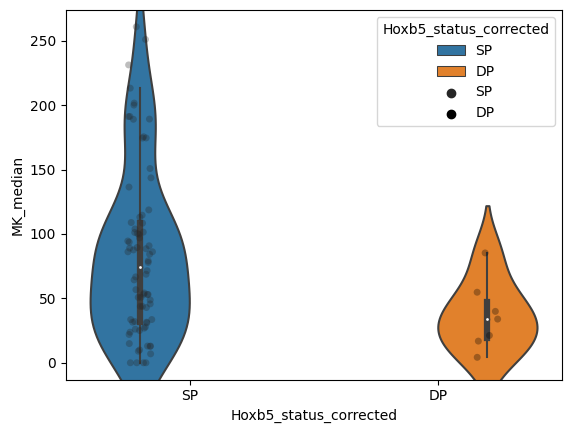

In [44]:
#NEIGHBOURHOOD ANALYSIS


import statistics
import seaborn as sns


data= pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output12/combined_data_v12.csv', header = 0)
data.dropna()
count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]

# print(len(data))
#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 10:#was 3
        Hoxb5Vwf_cells.append(i) #137
# # print(Hoxb5Vwf_cells)
    # dflist.append(newdf)
# datax=pd.concat(dflist)

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
print(Hoxb5Vwf_list)


datax=data
datax['Hoxb5_status_corrected']='SP'
for i in datax.index:
    if datax.loc[i,'Final_Cell_ID'] in Hoxb5Vwf_list:
        datax.loc[i,'Hoxb5_status_corrected']='DP'


dx=datax[['Final_Cell_ID', 'Hoxb5_status_corrected', 'Intensity_MinIntensity_DistanceTransformMK']]


#maximum displacement
dx['MK_median']=None
grouped=dx.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['MK_median']=newdf['Intensity_MinIntensity_DistanceTransformMK'].median()
    dflist.append(newdf)
data=pd.concat(dflist)


datab=data[['Final_Cell_ID', 'Hoxb5_status_corrected', 'MK_median']]
dx=datab.drop_duplicates()
print(dx['MK_median'])

# #MK
sns.violinplot(x=("Hoxb5_status_corrected"), hue='Hoxb5_status_corrected', y="MK_median", data=dx)
sns.stripplot(x=("Hoxb5_status_corrected"),hue='Hoxb5_status_corrected', y="MK_median", data=dx, dodge=True, color='black', alpha=0.3)

# perform one-way ANOVA for MK distance #could add time
# model = ols('MK_count ~  C(Treatment)', data=dx).fit()
model = ols('MK_median ~  C(Hoxb5_status_corrected)', data=data).fit()
sm.stats.anova_lm(model, typ=2)



0        0.000000
1        0.000000
2        0.000000
22       0.000000
43       0.000000
          ...    
347     51.196360
367    112.665558
380     24.144308
393      0.000000
414     10.533168
Name: plt_median, Length: 85, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/2429297986.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['plt_median']=None
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_82650/2429297986.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


,sum_sq,df,F,PR(>F)
C(Hoxb5_status_corrected),166089.541195,1.0,137.640562,1.200950e-27
Residual,500776.504250,415.0,NaN,NaN


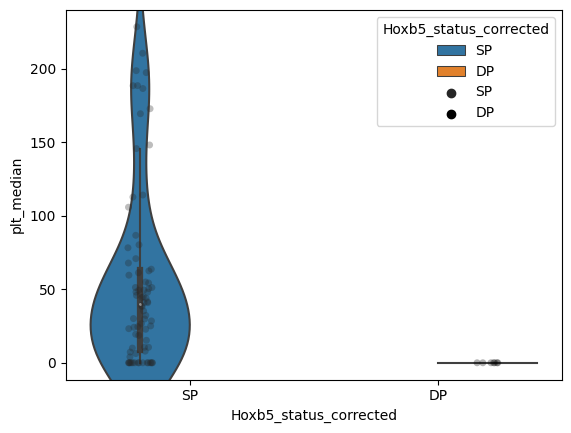

In [45]:
#PLT

dx=datax[['Final_Cell_ID', 'Hoxb5_status_corrected', 'Intensity_MinIntensity_DistanceTransforplt']]


dx['plt_median']=None
grouped=dx.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['plt_median']=newdf['Intensity_MinIntensity_DistanceTransforplt'].median()
    dflist.append(newdf)
data=pd.concat(dflist)


datab=data[['Final_Cell_ID', 'Hoxb5_status_corrected', 'plt_median']]
dx=datab.drop_duplicates()
print(dx['plt_median'])

# #MK
sns.violinplot(x=("Hoxb5_status_corrected"), hue='Hoxb5_status_corrected', y="plt_median", data=dx)
sns.stripplot(x=("Hoxb5_status_corrected"),hue='Hoxb5_status_corrected', y="plt_median", data=dx, dodge=True, color='black', alpha=0.3)

# perform one-way ANOVA for MK distance #could add time
# model = ols('MK_count ~  C(Treatment)', data=dx).fit()
model = ols('plt_median ~  C(Hoxb5_status_corrected)', data=data).fit()
sm.stats.anova_lm(model, typ=2)


